 Time Series Exploration (25 points)
     Take a look at the two supplied files: (1) timeseries_users.csv and (2) timeseries_events.csv. Table (1) Corresponds to a table of users with their respective ids and Table (2) corresponds to the time stamped events recorded for each user.

Suppose you want to do some preliminary analysis surrounding user behaviors.

Plot the distribution of “event counts” for all users who are male and 30 years old. An “event count” is defined as the number of observed events for a given user.
Suppose you are interested in understanding how long the gap is between observed events across users. Compute the “inter-event interval” for all events (defined as the difference in time between two sequential events associated with the same user). Once you have computed these intervals, plot the distribution of these intervals. Note: Certain users may contribute more inter-event intervals to the distribution than others- this is okay.

You will be graded on the correctness and reasonableness of your code. We also expect that you choose a reasonable method for visualizing the distributions above.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df_events = pd.read_csv('timeseries_events.csv')
df_users = pd.read_csv('timeseries_users.csv')

In [27]:
df_events.head(10)

user_id           event_date
0        0  2015-02-26 00:00:00
1        0  2015-03-10 00:00:00
2        0  2015-03-30 00:00:00
3        0  2015-02-15 00:00:00
4        0  2015-02-18 00:00:00
5        0  2015-02-22 00:00:00
6        0  2015-01-17 00:00:00
7        0  2015-02-01 00:00:00
8        0  2015-03-13 00:00:00
9        0  2015-02-14 00:00:00

In [28]:
print(df_events.shape)

(30593, 2)


In [63]:
df_users

age gender  user_id
0    51      f        0
1    49      f        1
2    35      m        2
3    63      m        3
4    27      f        4
5    59      f        5
6    39      f        6
7    42      f        7
8    34      f        8
9    26      f        9
10   52      f       10
11   43      f       11
12   45      m       12
13   53      f       13
14   38      f       14
15   54      f       15
16   52      f       16
17   51      m       17
18   24      f       18
19   49      f       19
20   50      f       20
21   41      m       21
22   36      f       22
23   56      m       23
24   40      f       24
25   39      f       25
26   62      f       26
27   42      f       27
28   39      f       28
29   27      f       29
30   28      m       30
31   42      m       31
32   27      m       32
33   52      m       33
34   38      f       34
35   28      f       35
36   25      f       36
37   39      f       37
38   34      m       38
39   47      f       39
40   41      m       40
41   45      f       41
42   29      f       42
43   31      f       43
44   32      f       44
45   39      m       45
46   43      f       46
47   61      m       47
48   33      f       48
49   37      f       49
50   41      f       50
51   30      f       51
52   61      f       52
53   31      f       53
54   46      f       54
55   42      f       55
56   51      f       56
57   25      f       57
58   29      m       58
59   29      m       59
60   53      m       60
61   35      f       61
62   28      m       62
63   38      f       63
64   62      m       64
65   50      f       65
66   51      m       66
67   33      m       67
68   53      f       68
69   50      f       69
70   52      f       70
71   42      m       71
72   33      m       72
73   45      f       73
74   54      m       74
75   35      f       75
76   37      f       76
77   33      f       77
78   35      m       78
79   53      f       79
80   36      f       80
81   51      f       81
82   33      f       82
83   29      m       83
84   33      m       84
85   33      f       85
86   46      f       86
87   45      f       87
88   35      f       88
89   37      m       89
90   60      m      200
91   35      f      201
92   41      m      220
93   53      m      225
94   48      m      226
95   56      m      227

In [30]:
print(df_users.shape)

(96, 3)


In [36]:
mapping = dict(df_users[['user_id', 'gender']].values)
df_events['gender'] = df_events.user_id.map(mapping)

mapping2 = dict(df_users[['user_id', 'age']].values)
df_events['age'] = df_events.user_id.map(mapping2)

df_events

user_id           event_date gender   age
0            0  2015-02-26 00:00:00      f  51.0
1            0  2015-03-10 00:00:00      f  51.0
2            0  2015-03-30 00:00:00      f  51.0
3            0  2015-02-15 00:00:00      f  51.0
4            0  2015-02-18 00:00:00      f  51.0
5            0  2015-02-22 00:00:00      f  51.0
6            0  2015-01-17 00:00:00      f  51.0
7            0  2015-02-01 00:00:00      f  51.0
8            0  2015-03-13 00:00:00      f  51.0
9            0  2015-02-14 00:00:00      f  51.0
10           0  2015-01-17 00:00:00      f  51.0
11           0  2015-02-02 00:00:00      f  51.0
12           0  2015-03-19 00:00:00      f  51.0
13           0  2015-03-20 00:00:00      f  51.0
14           0  2015-02-21 00:00:00      f  51.0
15           0  2015-02-23 00:00:00      f  51.0
16           0  2015-02-25 00:00:00      f  51.0
17           0  2015-01-23 00:00:00      f  51.0
18           0  2015-03-17 00:00:00      f  51.0
19           0  2015-02-03 00:00:00      f  51.0
20           0  2015-02-12 00:00:00      f  51.0
21           0  2015-02-23 00:00:00      f  51.0
22           0  2015-03-26 00:00:00      f  51.0
23           0  2015-04-04 00:00:00      f  51.0
24           0  2015-02-11 00:00:00      f  51.0
25           0  2015-03-01 00:00:00      f  51.0
26           0  2015-03-18 00:00:00      f  51.0
27           0  2015-03-21 00:00:00      f  51.0
28           0  2015-02-20 00:00:00      f  51.0
29           0  2015-02-27 00:00:00      f  51.0
...        ...                  ...    ...   ...
30563       96  2015-01-28 00:00:00    NaN   NaN
30564       96  2015-02-05 00:00:00    NaN   NaN
30565       96  2015-02-15 00:00:00    NaN   NaN
30566       96  2015-02-19 00:00:00    NaN   NaN
30567       96  2015-03-12 00:00:00    NaN   NaN
30568       96  2015-03-14 00:00:00    NaN   NaN
30569       96  2015-03-19 00:00:00    NaN   NaN
30570       96  2015-03-21 00:00:00    NaN   NaN
30571       96  2015-02-25 00:00:00    NaN   NaN
30572       96  2015-01-26 00:00:00    NaN   NaN
30573       96  2015-02-18 00:00:00    NaN   NaN
30574       96  2015-03-19 00:00:00    NaN   NaN
30575       96  2015-03-04 00:00:00    NaN   NaN
30576       96  2015-03-11 00:00:00    NaN   NaN
30577       96  2015-02-09 00:00:00    NaN   NaN
30578       96  2015-02-06 00:00:00    NaN   NaN
30579       96  2015-03-15 00:00:00    NaN   NaN
30580       96  2015-03-17 00:00:00    NaN   NaN
30581       96  2015-01-27 00:00:00    NaN   NaN
30582       96  2015-03-08 00:00:00    NaN   NaN
30583       96  2015-03-16 00:00:00    NaN   NaN
30584       96  2015-03-18 00:00:00    NaN   NaN
30585       96  2015-04-13 00:00:00    NaN   NaN
30586       96  2015-01-04 00:00:00    NaN   NaN
30587       96  2015-03-30 00:00:00    NaN   NaN
30588       96  2015-02-24 00:00:00    NaN   NaN
30589       96  2015-02-08 00:00:00    NaN   NaN
30590       96  2015-04-06 00:00:00    NaN   NaN
30591       96  2015-04-08 00:00:00    NaN   NaN
30592       96  2015-03-23 00:00:00    NaN   NaN

[30593 rows x 4 columns]

In [37]:
df = df_events.copy()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30593 entries, 0 to 30592
Data columns (total 4 columns):
user_id       30593 non-null int64
event_date    30593 non-null object
gender        28280 non-null object
age           28280 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 956.1+ KB


In [41]:
pd.set_option('display.max_rows', 30593)

In [44]:
df = df.dropna(how = 'any')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 0 to 28279
Data columns (total 4 columns):
user_id       28280 non-null int64
event_date    28280 non-null object
gender        28280 non-null object
age           28280 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


Plot the distribution of “event counts” for all users who are male and 30 years old. An “event count” is defined as the number of observed events for a given user.


In [54]:
df

user_id           event_date gender   age
0            0  2015-02-26 00:00:00      f  51.0
1            0  2015-03-10 00:00:00      f  51.0
2            0  2015-03-30 00:00:00      f  51.0
3            0  2015-02-15 00:00:00      f  51.0
4            0  2015-02-18 00:00:00      f  51.0
5            0  2015-02-22 00:00:00      f  51.0
6            0  2015-01-17 00:00:00      f  51.0
7            0  2015-02-01 00:00:00      f  51.0
8            0  2015-03-13 00:00:00      f  51.0
9            0  2015-02-14 00:00:00      f  51.0
10           0  2015-01-17 00:00:00      f  51.0
11           0  2015-02-02 00:00:00      f  51.0
12           0  2015-03-19 00:00:00      f  51.0
13           0  2015-03-20 00:00:00      f  51.0
14           0  2015-02-21 00:00:00      f  51.0
15           0  2015-02-23 00:00:00      f  51.0
16           0  2015-02-25 00:00:00      f  51.0
17           0  2015-01-23 00:00:00      f  51.0
18           0  2015-03-17 00:00:00      f  51.0
19           0  2015-02-03 00:00:00      f  51.0
20           0  2015-02-12 00:00:00      f  51.0
21           0  2015-02-23 00:00:00      f  51.0
22           0  2015-03-26 00:00:00      f  51.0
23           0  2015-04-04 00:00:00      f  51.0
24           0  2015-02-11 00:00:00      f  51.0
25           0  2015-03-01 00:00:00      f  51.0
26           0  2015-03-18 00:00:00      f  51.0
27           0  2015-03-21 00:00:00      f  51.0
28           0  2015-02-20 00:00:00      f  51.0
29           0  2015-02-27 00:00:00      f  51.0
30           0  2015-01-25 00:00:00      f  51.0
31           0  2015-01-18 00:00:00      f  51.0
32           0  2015-01-28 00:00:00      f  51.0
33           0  2015-03-03 00:00:00      f  51.0
34           0  2015-04-06 00:00:00      f  51.0
35           0  2015-02-09 00:00:00      f  51.0
36           0  2015-01-21 00:00:00      f  51.0
37           0  2015-02-16 00:00:00      f  51.0
38           0  2015-01-15 00:00:00      f  51.0
39           0  2015-04-11 00:00:00      f  51.0
40           0  2015-02-24 00:00:00      f  51.0
41           0  2015-02-26 00:00:00      f  51.0
42           0  2015-01-30 00:00:00      f  51.0
43           0  2015-01-29 00:00:00      f  51.0
44           0  2015-03-11 00:00:00      f  51.0
45           0  2015-04-02 00:00:00      f  51.0
46           0  2015-02-14 00:00:00      f  51.0
47           0  2015-02-05 00:00:00      f  51.0
48           0  2015-02-13 00:00:00      f  51.0
49           0  2015-03-14 00:00:00      f  51.0
50           0  2015-02-08 00:00:00      f  51.0
51           0  2015-02-07 00:00:00      f  51.0
52           0  2015-03-19 00:00:00      f  51.0
53           0  2015-03-23 00:00:00      f  51.0
54           0  2015-02-27 00:00:00      f  51.0
55           0  2015-01-30 00:00:00      f  51.0
56           0  2015-02-28 00:00:00      f  51.0
57           0  2015-03-08 00:00:00      f  51.0
58           0  2015-04-06 00:00:00      f  51.0
59           0  2015-03-05 00:00:00      f  51.0
60           0  2015-04-13 00:00:00      f  51.0
61           0  2015-03-04 00:00:00      f  51.0
62           0  2015-02-08 00:00:00      f  51.0
63           0  2015-02-07 00:00:00      f  51.0
64           0  2015-03-15 00:00:00      f  51.0
65           0  2015-03-17 00:00:00      f  51.0
66           0  2015-04-03 00:00:00      f  51.0
67           0  2015-04-05 00:00:00      f  51.0
68           0  2015-02-28 00:00:00      f  51.0
69           0  2015-01-19 00:00:00      f  51.0
70           0  2015-03-10 00:00:00      f  51.0
71           0  2015-02-21 00:00:00      f  51.0
72           0  2015-01-16 00:00:00      f  51.0
73           0  2015-02-02 00:00:00      f  51.0
74           0  2015-03-01 00:00:00      f  51.0
75           0  2015-01-22 00:00:00      f  51.0
76           0  2015-01-25 00:00:00      f  51.0
77           0  2015-02-06 00:00:00      f  51.0
78           0  2015-03-21 00:00:00      f  51.0
79           0  2015-03-25 00:00:00      f  51.0
80           0  2015-02-25 00:00:00   

In [66]:
prob1 = df[(df['gender'] == 'm') & (df['age'] >= 30.0)]

In [67]:
prob1.head()

user_id           event_date gender   age
657        2  2015-03-06 00:00:00      m  35.0
658        2  2015-03-19 00:00:00      m  35.0
659        2  2015-03-15 00:00:00      m  35.0
660        2  2015-02-27 00:00:00      m  35.0
661        2  2015-02-26 00:00:00      m  35.0

In [70]:
prob1 = prob1.groupby('user_id').count()

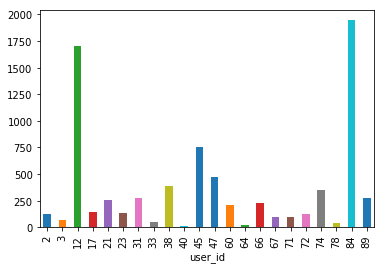

In [74]:
prob1.event_date.plot('bar')

In [72]:
prob1.head()

event_date  gender   age
user_id                          
2               126     126   126
3                65      65    65
12             1705    1705  1705
17              147     147   147
21              254     254   254

Suppose you are interested in understanding how long the gap is between observed events across users. Compute the “inter-event interval” for all events (defined as the difference in time between two sequential events associated with the same user). Once you have computed these intervals, plot the distribution of these intervals. Note: Certain users may contribute more inter-event intervals to the distribution than others- this is okay.


In [76]:
df = df_events.copy()
df = df.dropna(how = 'any')

In [77]:
df.head()

user_id           event_date gender   age
0        0  2015-02-26 00:00:00      f  51.0
1        0  2015-03-10 00:00:00      f  51.0
2        0  2015-03-30 00:00:00      f  51.0
3        0  2015-02-15 00:00:00      f  51.0
4        0  2015-02-18 00:00:00      f  51.0

In [101]:
time = []

for row in df.event_date:
    
    
    time.append(row.rsplit(' ')[0])
    
    
    

In [102]:
time

['2015-02-26',
 '2015-03-10',
 '2015-03-30',
 '2015-02-15',
 '2015-02-18',
 '2015-02-22',
 '2015-01-17',
 '2015-02-01',
 '2015-03-13',
 '2015-02-14',
 '2015-01-17',
 '2015-02-02',
 '2015-03-19',
 '2015-03-20',
 '2015-02-21',
 '2015-02-23',
 '2015-02-25',
 '2015-01-23',
 '2015-03-17',
 '2015-02-03',
 '2015-02-12',
 '2015-02-23',
 '2015-03-26',
 '2015-04-04',
 '2015-02-11',
 '2015-03-01',
 '2015-03-18',
 '2015-03-21',
 '2015-02-20',
 '2015-02-27',
 '2015-01-25',
 '2015-01-18',
 '2015-01-28',
 '2015-03-03',
 '2015-04-06',
 '2015-02-09',
 '2015-01-21',
 '2015-02-16',
 '2015-01-15',
 '2015-04-11',
 '2015-02-24',
 '2015-02-26',
 '2015-01-30',
 '2015-01-29',
 '2015-03-11',
 '2015-04-02',
 '2015-02-14',
 '2015-02-05',
 '2015-02-13',
 '2015-03-14',
 '2015-02-08',
 '2015-02-07',
 '2015-03-19',
 '2015-03-23',
 '2015-02-27',
 '2015-01-30',
 '2015-02-28',
 '2015-03-08',
 '2015-04-06',
 '2015-03-05',
 '2015-04-13',
 '2015-03-04',
 '2015-02-08',
 '2015-02-07',
 '2015-03-15',
 '2015-03-17',
 '2015-04-

In [103]:
df.event_date = time

In [104]:
df.head()

user_id  event_date gender   age
0        0  2015-02-26      f  51.0
1        0  2015-03-10      f  51.0
2        0  2015-03-30      f  51.0
3        0  2015-02-15      f  51.0
4        0  2015-02-18      f  51.0

In [106]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)
    
    

In [123]:
inter_arrival = []

for i in range(len(df) - 1) :
    
    difference = days_between(df.event_date[i], df.event_date[i+1])
    
    inter_arrival.append(difference)

In [124]:
inter_arrival.insert(0, 0)

In [126]:
df['inter_arrival'] = inter_arrival

In [127]:
df.head()

user_id  event_date gender   age  inter_arrival
0        0  2015-02-26      f  51.0              0
1        0  2015-03-10      f  51.0             12
2        0  2015-03-30      f  51.0             20
3        0  2015-02-15      f  51.0             43
4        0  2015-02-18      f  51.0              3

In [130]:
prob2 = df.groupby('user_id').mean()
prob2.head()

age  inter_arrival
user_id                     
0        51.0      27.391892
1        49.0     118.463654
2        35.0      21.920635
3        63.0      21.538462
4        27.0      50.064777

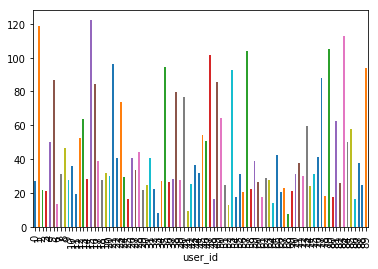

In [138]:
prob2.inter_arrival.plot('bar')

In [147]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]

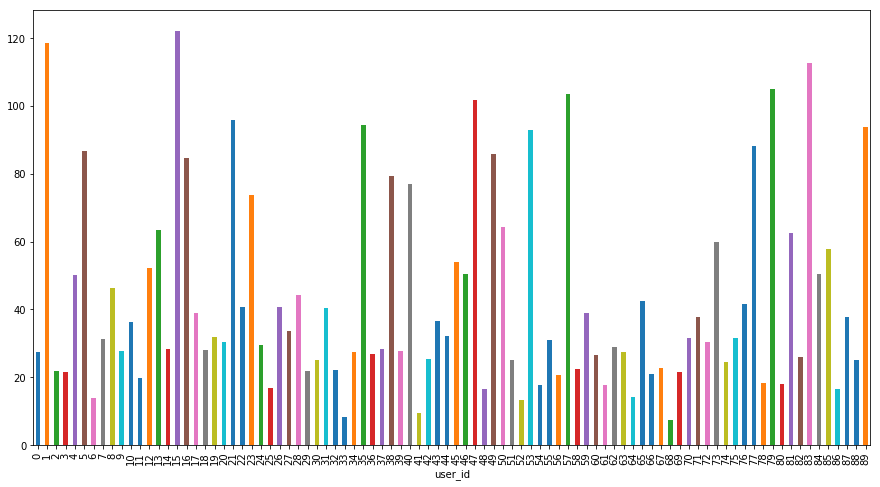

In [148]:
prob2.inter_arrival.plot('bar')